# Ajuste de Curvas con sklearn MLPRegressor

Este notebook utiliza **scikit-learn** para ajustar curvas usando perceptrones multicapa.

## Dependencias instaladas:
- `scikit-learn` (MLPRegressor)
- `numpy` (operaciones numéricas)
- `matplotlib` (visualización)

**Nota:** Asegúrate de que el kernel de Jupyter esté usando el entorno virtual del proyecto donde están instaladas las dependencias.

In [4]:
# Verificar instalación de dependencias
import sys
import numpy as np
print(f"Python: {sys.version}")

try:
    import sklearn
    print(f"✓ scikit-learn: {sklearn.__version__}")
except ImportError as e:
    print(f"✗ Error al importar sklearn: {e}")

try:
    import numpy as np
    print(f"✓ numpy: {np.__version__}")
except ImportError as e:
    print(f"✗ Error al importar numpy: {e}")

try:
    import matplotlib
    print(f"✓ matplotlib: {matplotlib.__version__}")
except ImportError as e:
    print(f"✗ Error al importar matplotlib: {e}")

print("\n¡Todo listo para usar MLPRegressor!")

Python: 3.14.0 (main, Oct 10 2025, 12:54:13) [Clang 20.1.4 ]
✓ scikit-learn: 1.7.2
✓ numpy: 2.3.4
✓ matplotlib: 3.10.7

¡Todo listo para usar MLPRegressor!


📊 EJEMPLO 1: Ajuste de curva cúbica

Error cuadrático medio: 0.0771
R² Score: 0.9870
Iteraciones: 142


Text(0.5, 1.0, 'Curva Cúbica: y = 0.5x³ - x² + 0.5x + 1')

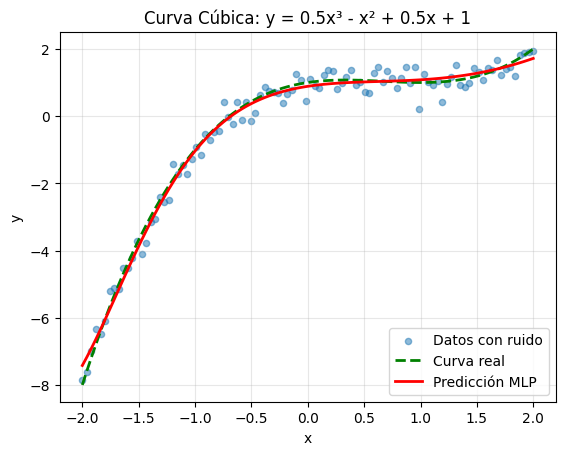

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ============================================================================
# EJEMPLO 1: Curva Cúbica
# ============================================================================
print("📊 EJEMPLO 1: Ajuste de curva cúbica\n")

# Generar datos
np.random.seed(42)
X_cubic = np.linspace(-2, 2, 100).reshape(-1, 1)
y_cubic_real = 0.5 * X_cubic**3 - X_cubic**2 + 0.5 * X_cubic + 1
y_cubic = y_cubic_real + np.random.normal(0, 0.3, X_cubic.shape)

# Crear y entrenar el modelo
# hidden_layer_sizes = (10, 8) significa 2 capas ocultas con 10 y 8 neuronas
mlp_cubic = MLPRegressor(
    hidden_layer_sizes=(20,20,20,40),  # Arquitectura: entrada → 10 → 8 → salida
    activation='tanh',           # Función de activación
    solver='adam',               # Algoritmo de optimización
    max_iter=2000,               # Número máximo de iteraciones
    random_state=42,
    learning_rate_init=0.01
)

mlp_cubic.fit(X_cubic, y_cubic.ravel())

# Predicciones
y_pred_cubic = mlp_cubic.predict(X_cubic)

# Métricas
mse = mean_squared_error(y_cubic, y_pred_cubic)
r2 = r2_score(y_cubic, y_pred_cubic)

print(f"Error cuadrático medio: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Iteraciones: {mlp_cubic.n_iter_}")

# Graficar

plt.scatter(X_cubic, y_cubic, alpha=0.5, s=20, label='Datos con ruido')
plt.plot(X_cubic, y_cubic_real, 'g--', label='Curva real', linewidth=2)
plt.plot(X_cubic, y_pred_cubic, 'r-', label='Predicción MLP', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Curva Cúbica: y = 0.5x³ - x² + 0.5x + 1')



📊 EJEMPLO 2: Ajuste de función seno

Error cuadrático medio: 0.0288
R² Score: 0.9433
Iteraciones: 602


Text(0.5, 1.0, 'Función Seno')

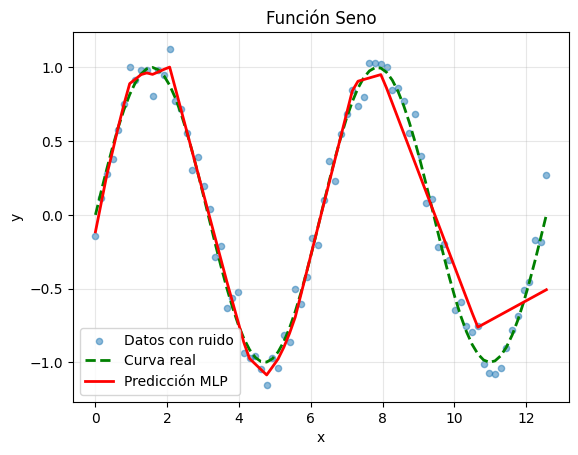

In [10]:

# ============================================================================
# EJEMPLO 2: Función Seno
# ============================================================================
print("\n📊 EJEMPLO 2: Ajuste de función seno\n")

X_sin = np.linspace(0, 4*np.pi, 80).reshape(-1, 1)
y_sin_real = np.sin(X_sin)
y_sin = y_sin_real + np.random.normal(0, 0.1, X_sin.shape)

mlp_sin = MLPRegressor(
    hidden_layer_sizes=(15, 10, 10,10,5),  # Red más profunda: 3 capas ocultas
    activation='relu',
    solver='adam',
    max_iter=3000,
    random_state=42
)

mlp_sin.fit(X_sin, y_sin.ravel())
y_pred_sin = mlp_sin.predict(X_sin)

mse_sin = mean_squared_error(y_sin, y_pred_sin)
r2_sin = r2_score(y_sin, y_pred_sin)

print(f"Error cuadrático medio: {mse_sin:.4f}")
print(f"R² Score: {r2_sin:.4f}")
print(f"Iteraciones: {mlp_sin.n_iter_}")

plt.scatter(X_sin, y_sin, alpha=0.5, s=20, label='Datos con ruido')
plt.plot(X_sin, y_sin_real, 'g--', label='Curva real', linewidth=2)
plt.plot(X_sin, y_pred_sin, 'r-', label='Predicción MLP', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Función Seno')



📊 EJEMPLO 3: Curva compleja (seno + exponencial)

Error cuadrático medio: 0.0070
R² Score: 0.9497
Iteraciones: 77


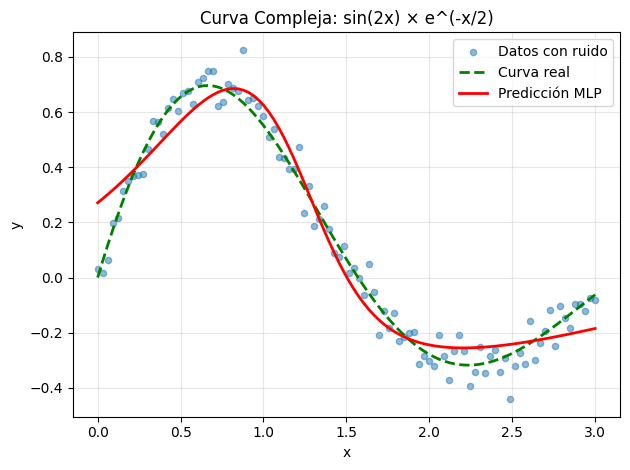


ARQUITECTURAS DE LAS REDES
Modelo 1 (Cúbica):   1 entrada → 10 → 8 → 1 salida
Modelo 2 (Seno):     1 entrada → 15 → 10 → 5 → 1 salida
Modelo 3 (Compleja): 1 entrada → 20 → 15 → 10 → 1 salida


In [ ]:

# ============================================================================
# EJEMPLO 3: Curva compleja (combinación)
# ============================================================================
print("\n📊 EJEMPLO 3: Curva compleja (seno + exponencial)\n")

X_complex = np.linspace(0, 3, 100).reshape(-1, 1)
y_complex_real = np.sin(2 * X_complex) * np.exp(-X_complex/2)
y_complex = y_complex_real + np.random.normal(0, 0.05, X_complex.shape)

mlp_complex = MLPRegressor(
    hidden_layer_sizes=(20, 15, 10),
    activation='tanh',
    solver='adam',
    max_iter=3000,
    random_state=42,
    learning_rate_init=0.01
)

mlp_complex.fit(X_complex, y_complex.ravel())
y_pred_complex = mlp_complex.predict(X_complex)

mse_complex = mean_squared_error(y_complex, y_pred_complex)
r2_complex  = r2_score(y_complex, y_pred_complex)

print(f"Error cuadrático medio: {mse_complex:.4f}")
print(f"R² Score: {r2_complex:.4f}")
print(f"Iteraciones: {mlp_complex.n_iter_}")

plt.scatter(X_complex, y_complex, alpha=0.5, s=20, label='Datos con ruido')
plt.plot(X_complex, y_complex_real, 'g--', label='Curva real', linewidth=2)
plt.plot(X_complex, y_pred_complex, 'r-', label='Predicción MLP', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Curva Compleja: sin(2x) × e^(-x/2)')

plt.tight_layout()
plt.show()

# ============================================================================
# INFORMACIÓN DE LA ARQUITECTURA
# ============================================================================
print("\n" + "="*60)
print("ARQUITECTURAS DE LAS REDES")
print("="*60)
print(f"Modelo 1 (Cúbica):   1 entrada → 10 → 8 → 1 salida")
print(f"Modelo 2 (Seno):     1 entrada → 15 → 10 → 5 → 1 salida")
print(f"Modelo 3 (Compleja): 1 entrada → 20 → 15 → 10 → 1 salida")
print("="*60)